Loading and Preprocessing 
Steps:
1. Loading the Dataset:
    * The dataset is loaded using the load_breast_cancer function from sklearn.datasets.
    * It includes tumor features (e.g., radius, texture, etc.) and a target variable (0: benign, 1: malignant).
2. Preprocessing:
    * Missing Values: While no missing values exist in this dataset, a check is performed for real-world readiness.
    * Duplicate Rows: Identify and remove duplicates (if any) to avoid bias in the model.
    * Removing Outliers: Outliers are detected using the IQR method and removed to improve model performance.
    * Skewness: Highly skewed features are transformed (e.g., using yeo-johnson).
    * Feature Selection: Highly correlated features are removed to prevent multicollinearity.
    * Feature Scaling: StandardScaler is used to scale features for algorithms sensitive to feature magnitudes.
  
Justifications for Each Step:
1. Missing Values: Even though this dataset does not have missing values, real-world datasets often do. Checking for them ensures readiness and helps maintain data integrity.
2. Duplicate Rows: Duplicates can skew model predictions and lead to overfitting. Removing them ensures data consistency.
3. Outliers: Outliers can negatively impact models (especially linear models). Removing them improves robustness.
4. Skewness: Skewed features can bias the learning process, especially for models like logistic regression. Log transformation reduces skewness.
5. Feature Selection: Highly correlated features can lead to multicollinearity, making it hard for models to assign importance to features. Removing them improves interpretability and model performance.
6. Feature Scaling: Scaling ensures features contribute equally, especially for algorithms like SVM, k-NN, and logistic regression.


In [198]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [199]:
data=load_breast_cancer()

In [200]:
x=data.data
y=data.target
feature=data.feature_names

In [201]:
df=pd.DataFrame(x,columns=feature)
df['target']=y

In [202]:
# to show starting 10 rows
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [203]:
# to show bottom 10 rows
df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1


In [204]:
# to get info about dataset(number of rows,non null count)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [205]:
df['target'] = df['target'].astype('int32')

In [206]:
# to get statistical information about all the numerical columns
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [207]:
# to observe null values
df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [208]:
# to get total null values in each column
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [209]:
# to find duplicated rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [210]:
# to find total duplicated rows
df.duplicated().sum()

0

<Axes: >

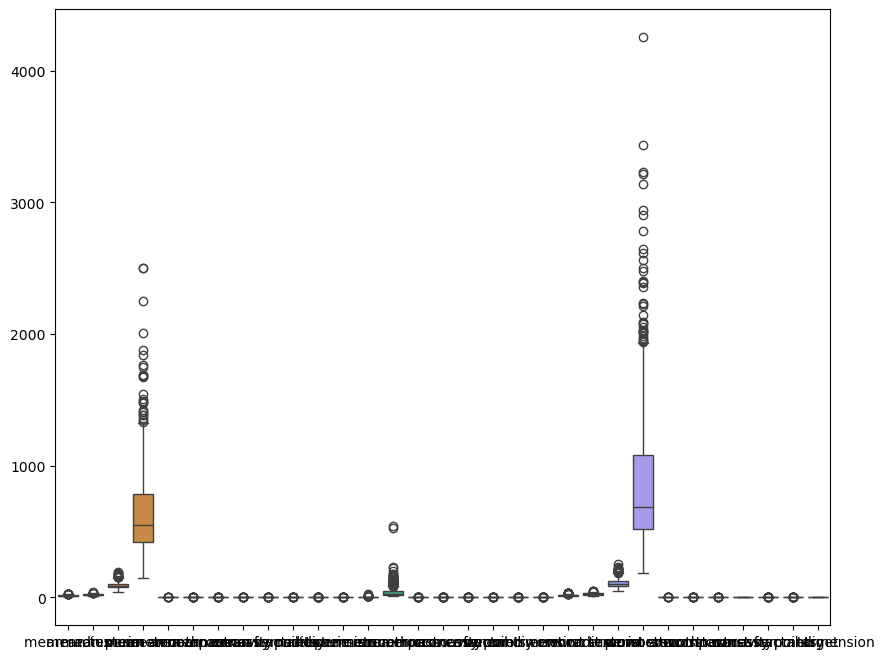

In [211]:
plt.figure(figsize=(10,8))
sns.boxplot(df)

<Axes: xlabel='mean radius'>

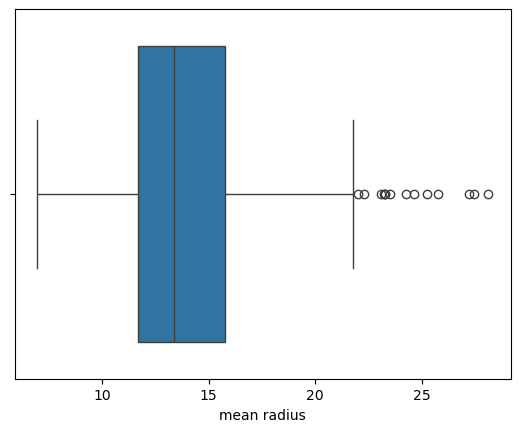

In [212]:
sns.boxplot(x=df['mean radius'])

In [213]:
# numerical columns together only
num_columns=df.select_dtypes(include='number')

In [214]:
num_columns

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: >

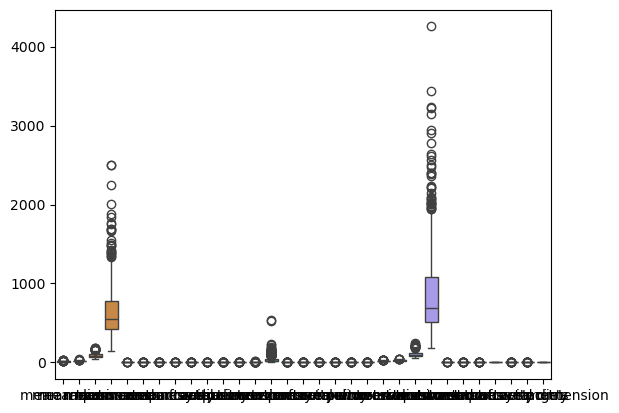

In [215]:
sns.boxplot(data=df)

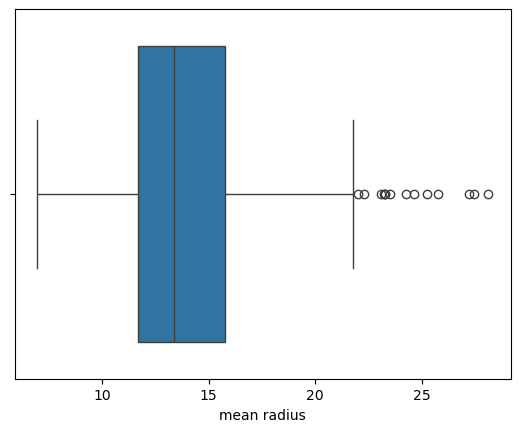

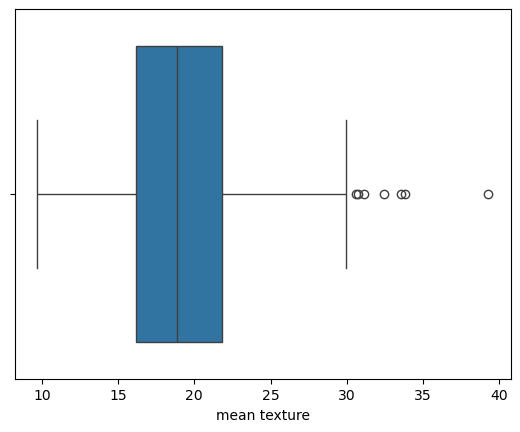

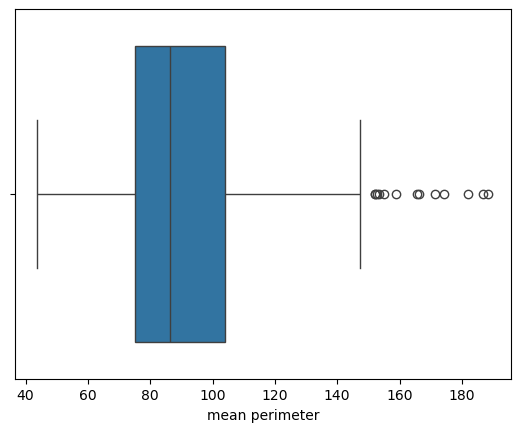

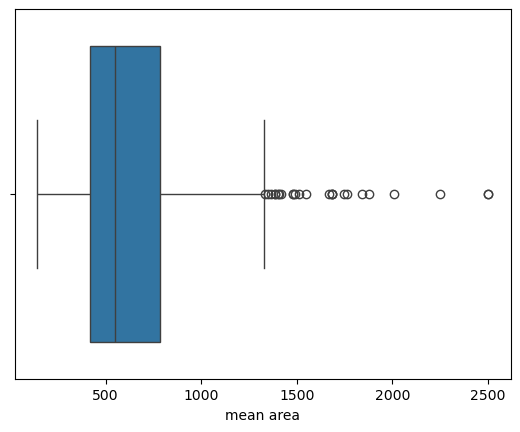

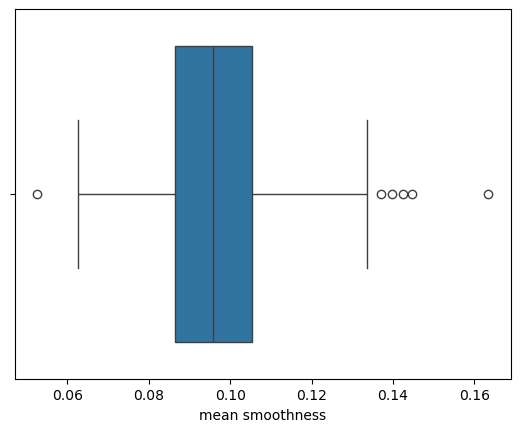

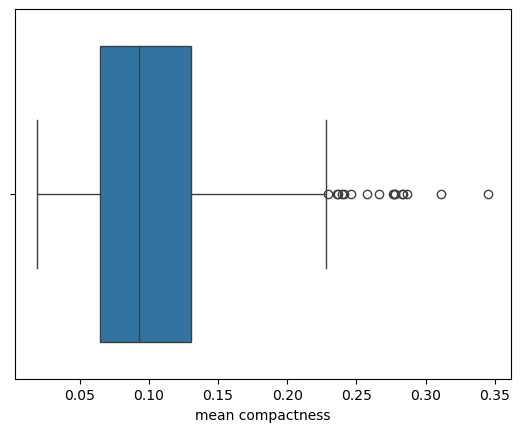

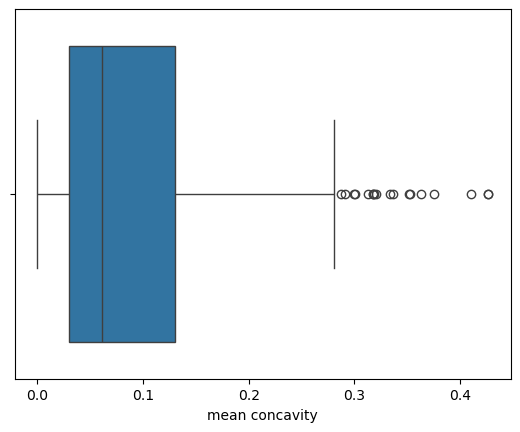

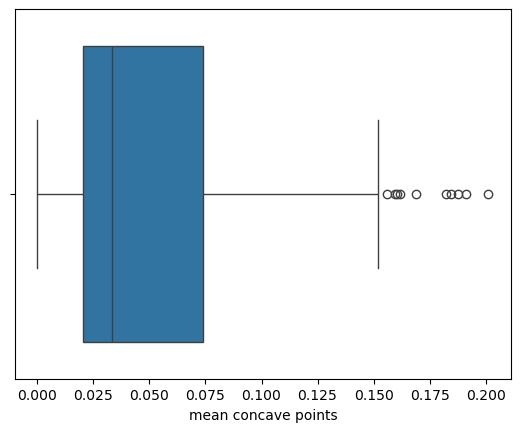

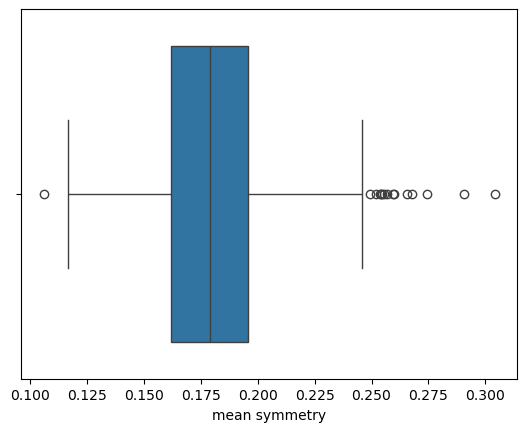

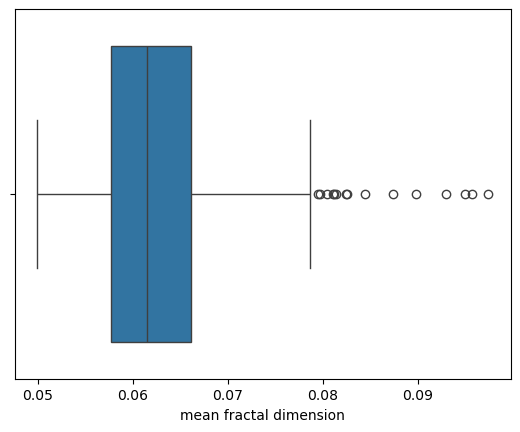

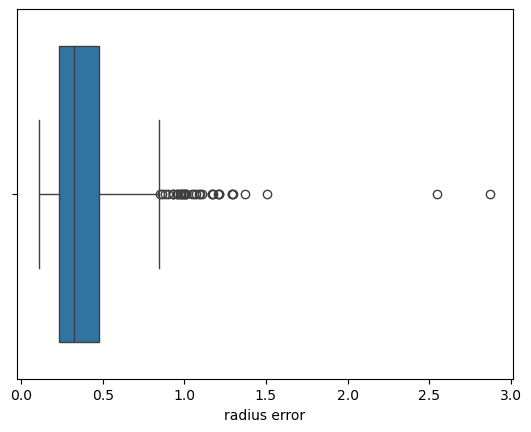

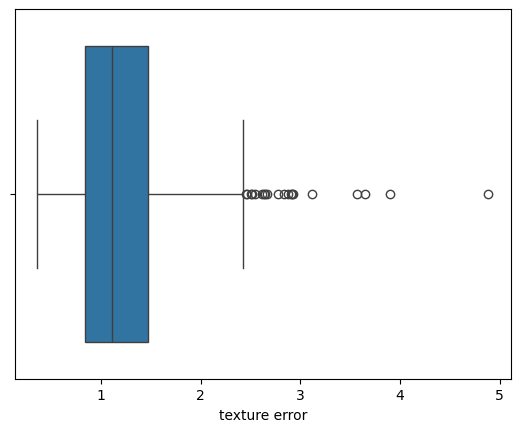

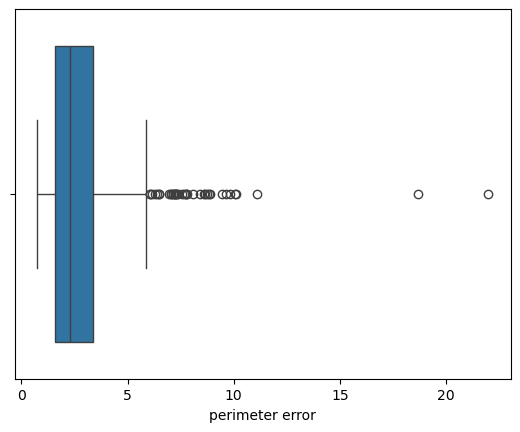

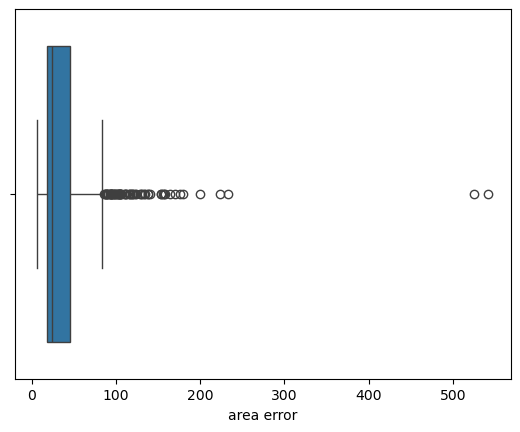

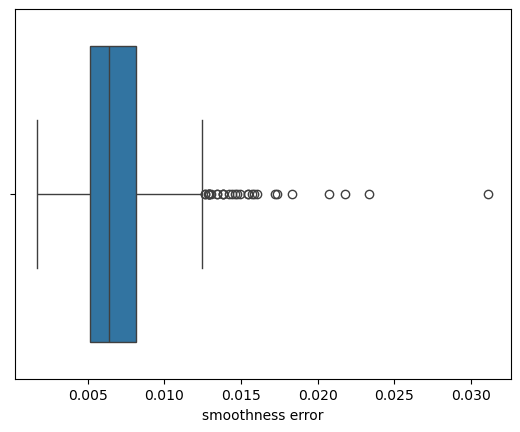

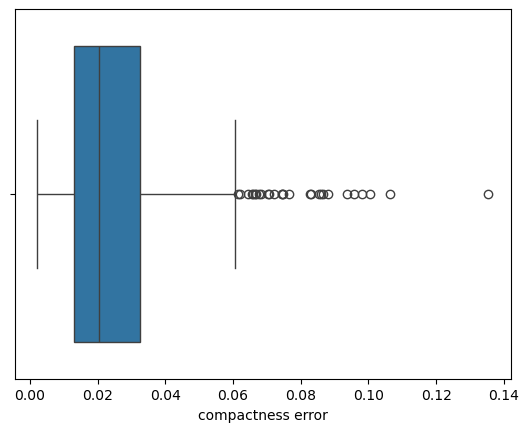

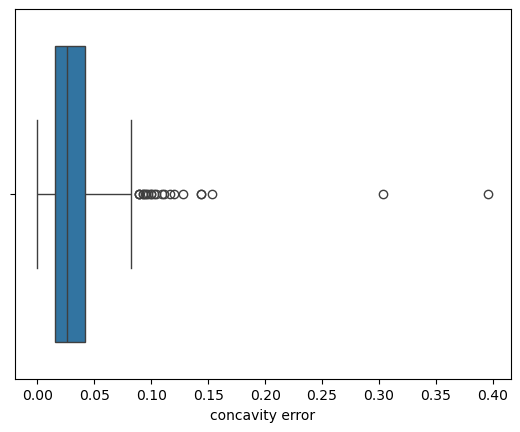

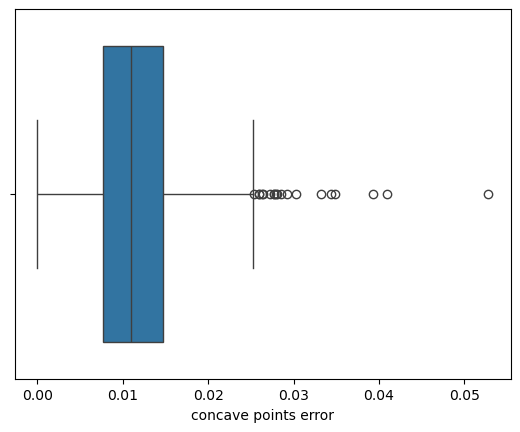

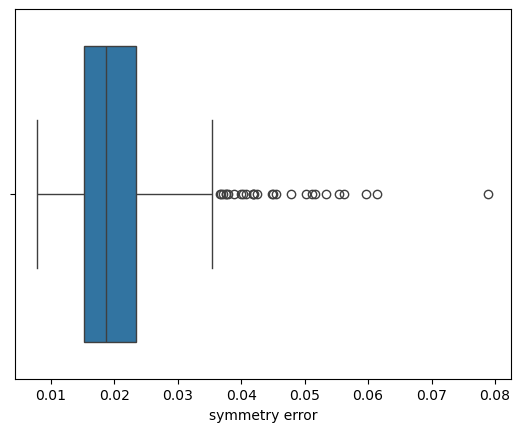

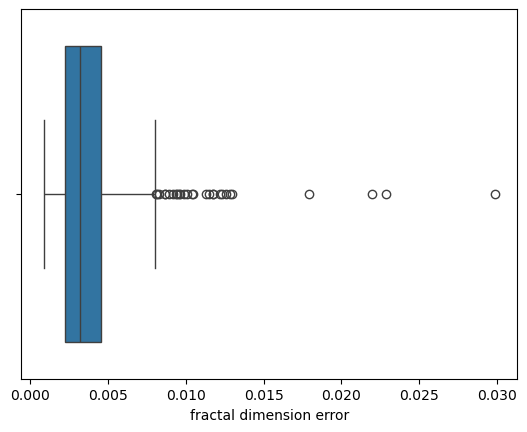

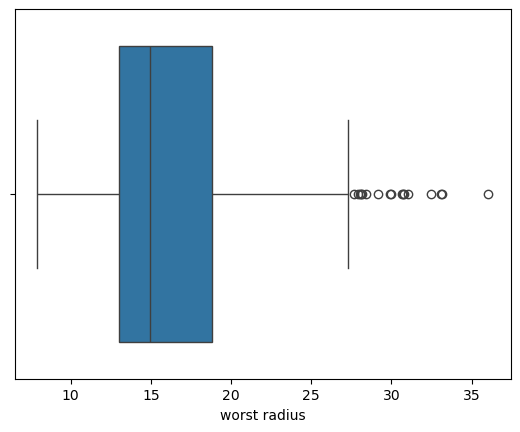

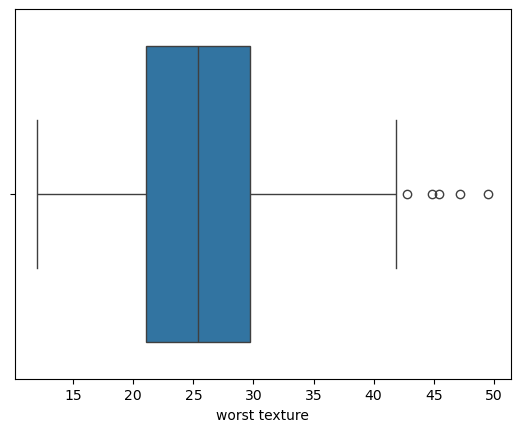

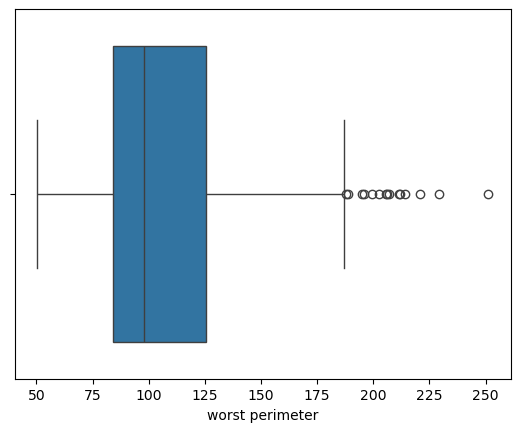

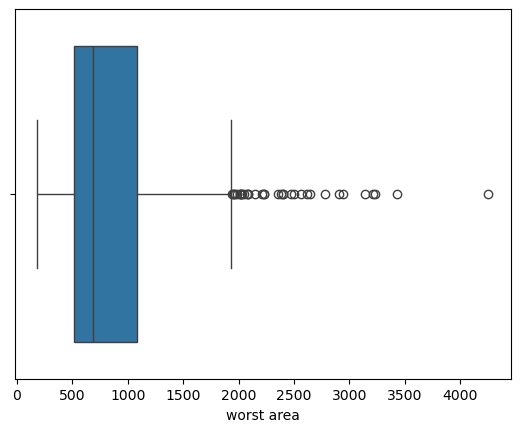

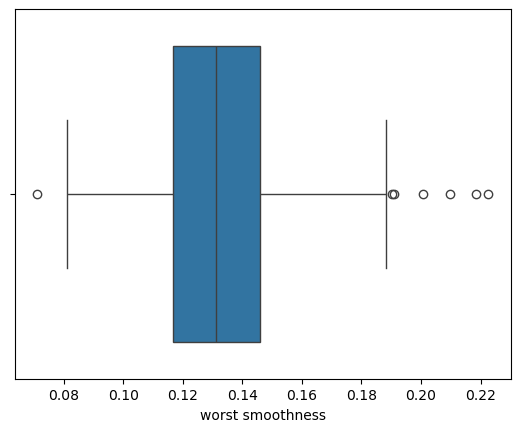

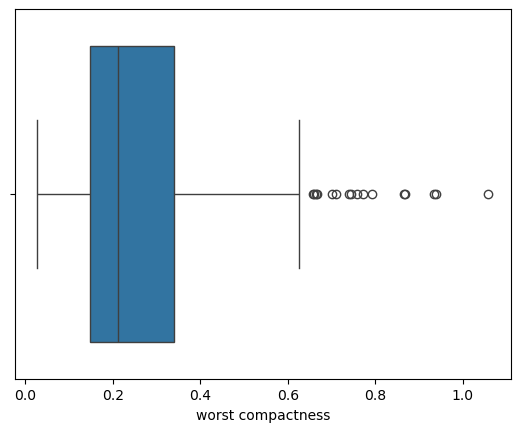

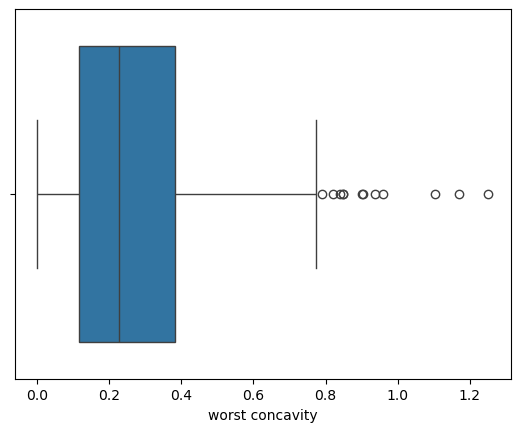

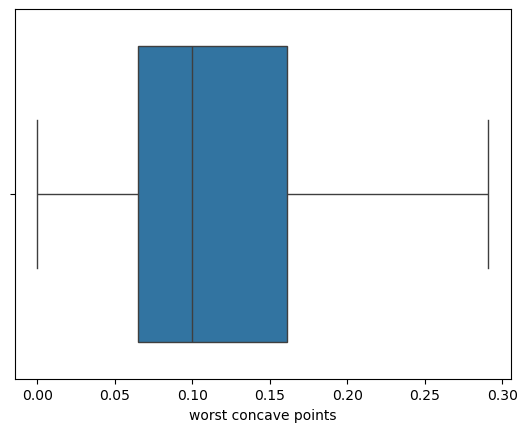

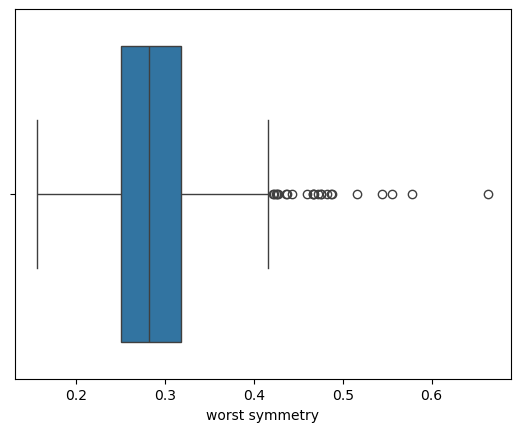

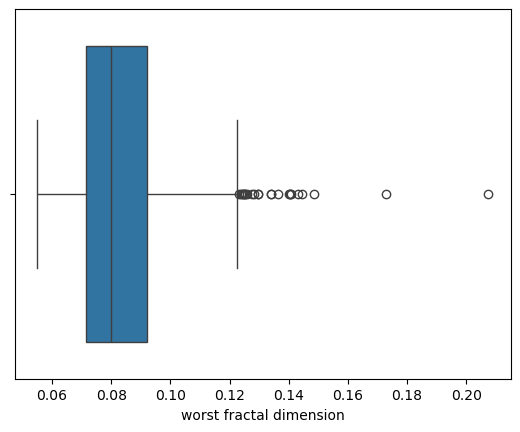

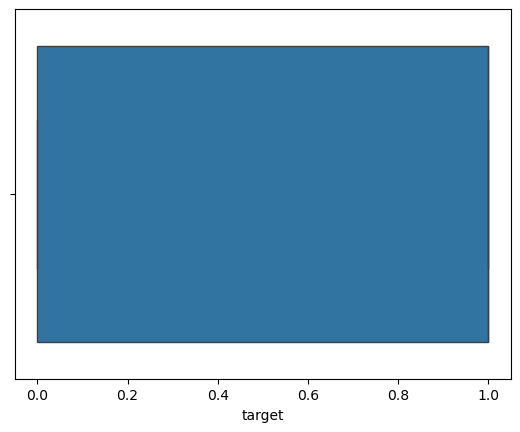

In [216]:
#loop designed to generate boxplots for each numerical column in a DataFrame
for i in num_columns.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [217]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [218]:
df1=outliers(df)

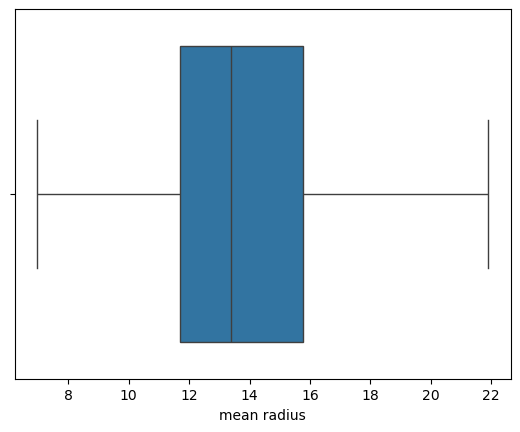

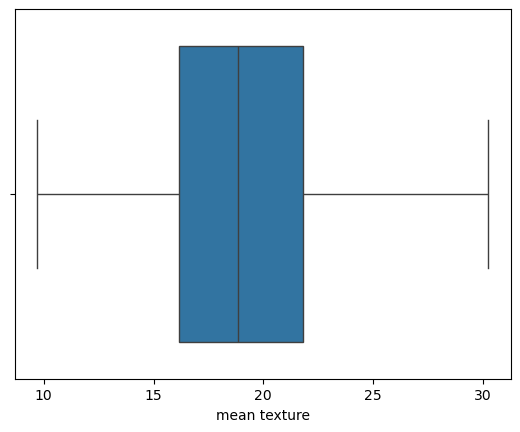

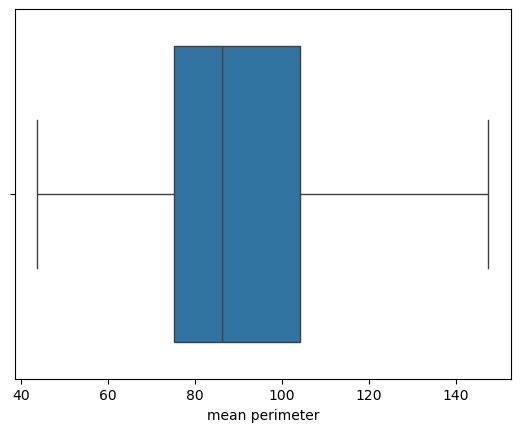

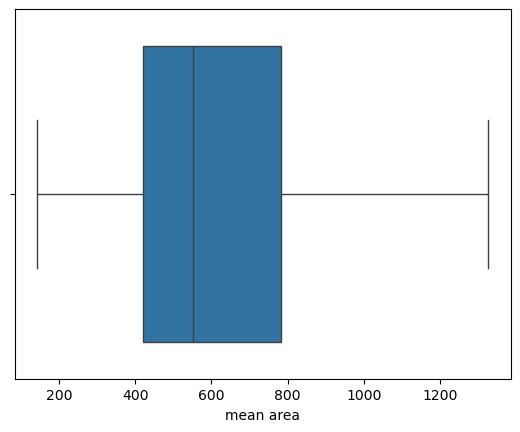

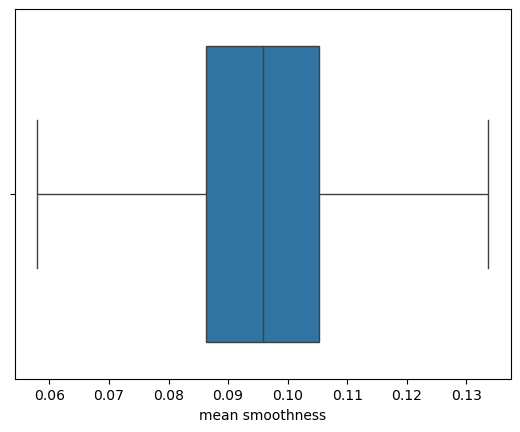

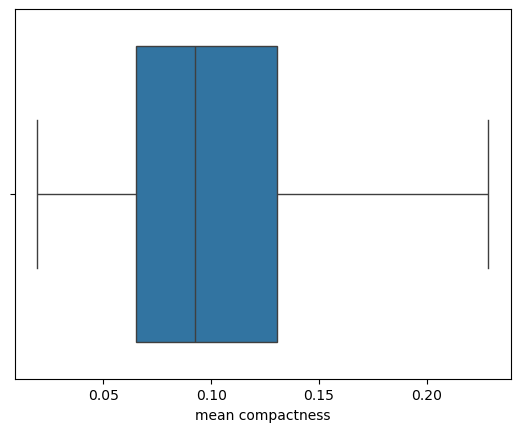

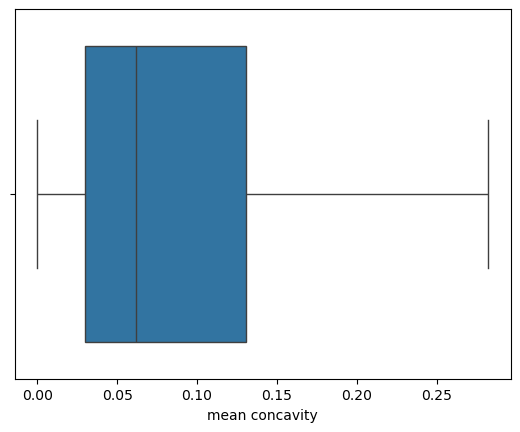

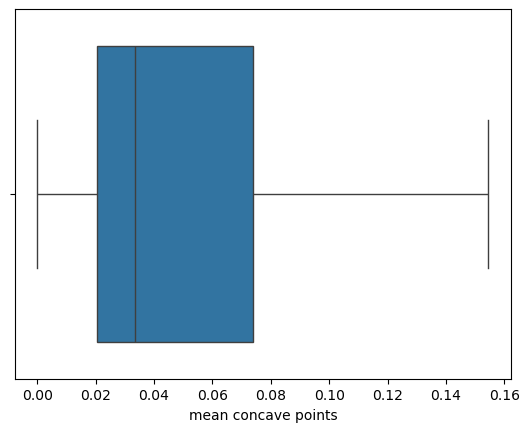

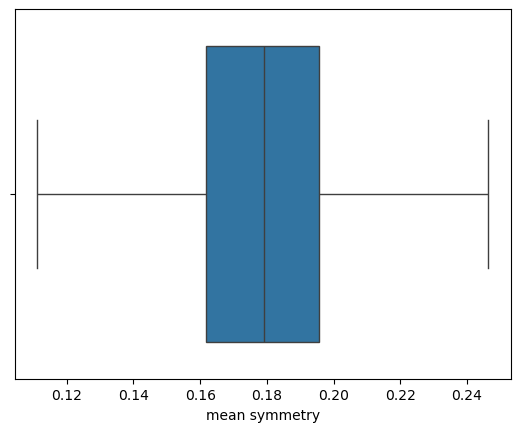

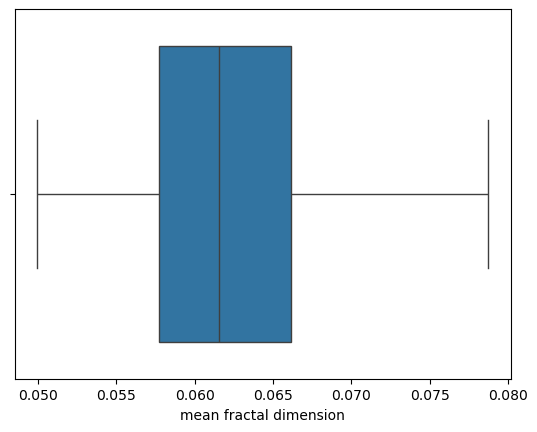

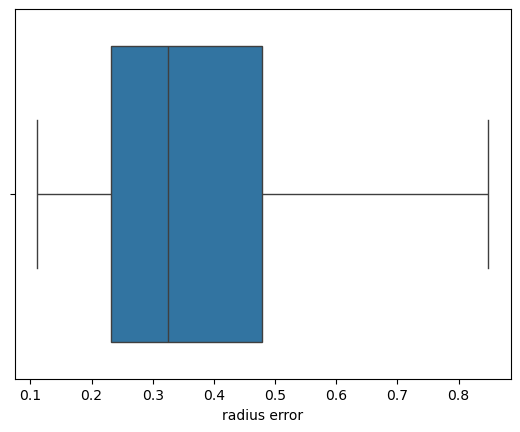

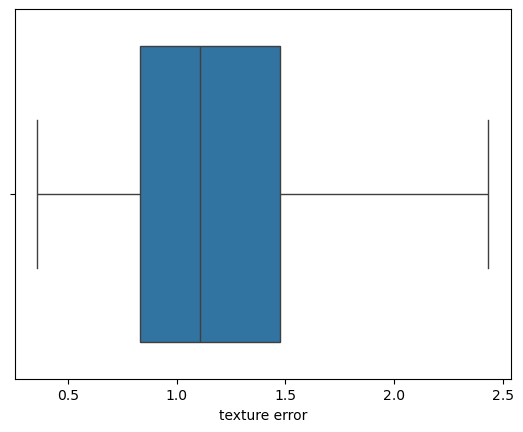

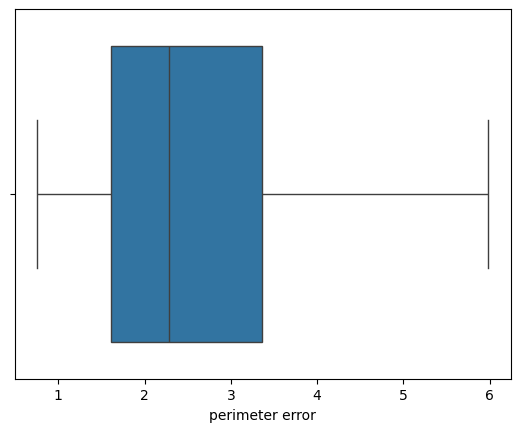

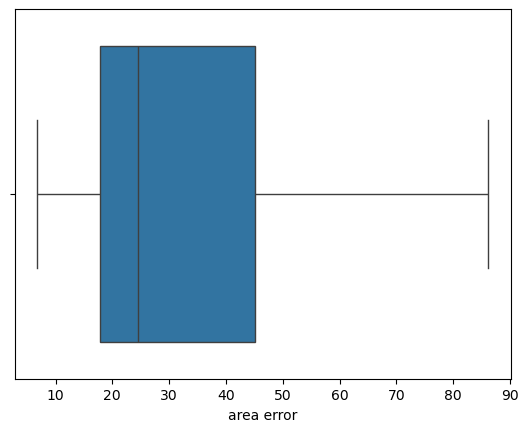

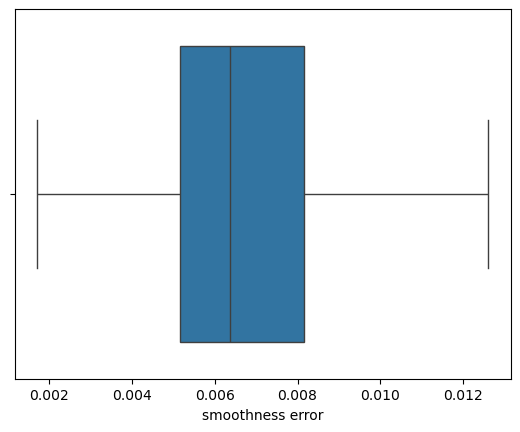

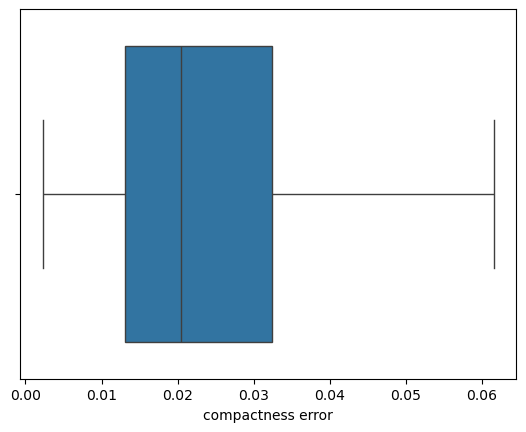

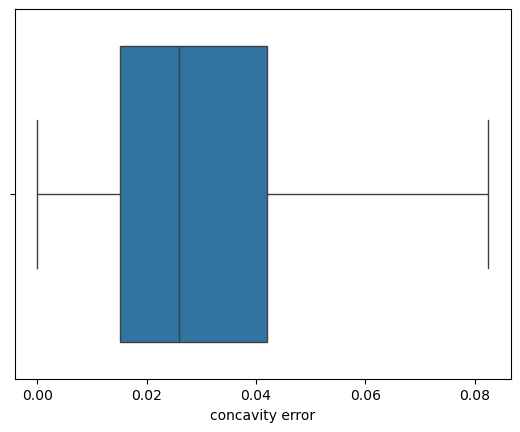

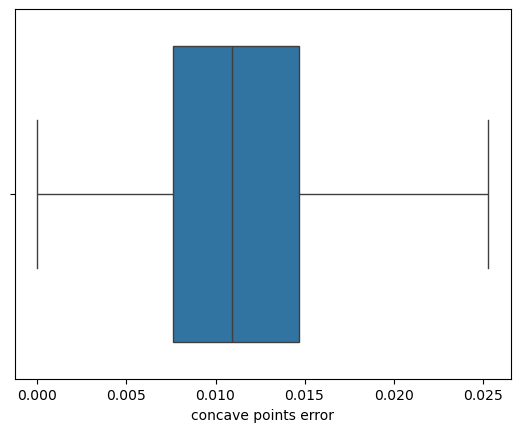

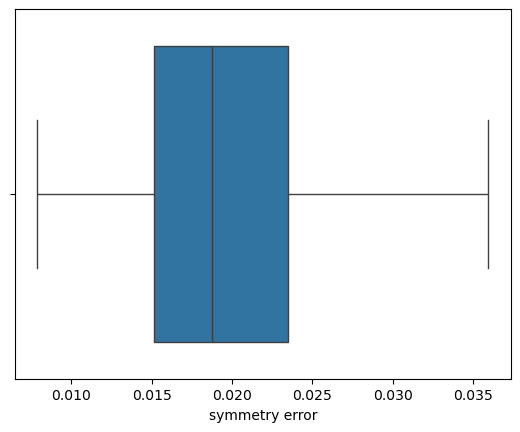

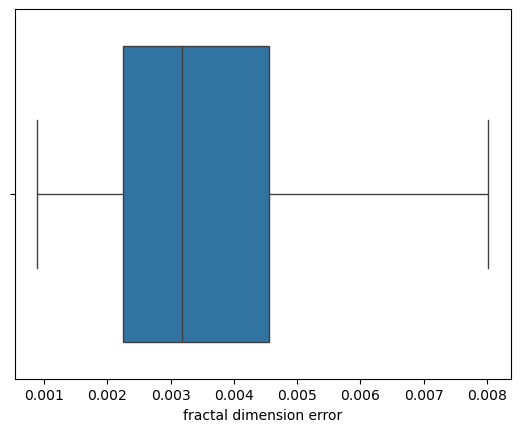

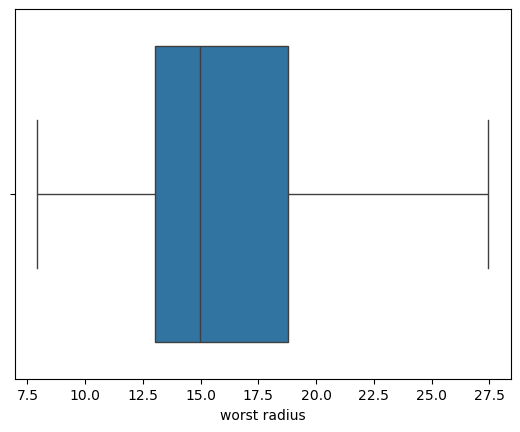

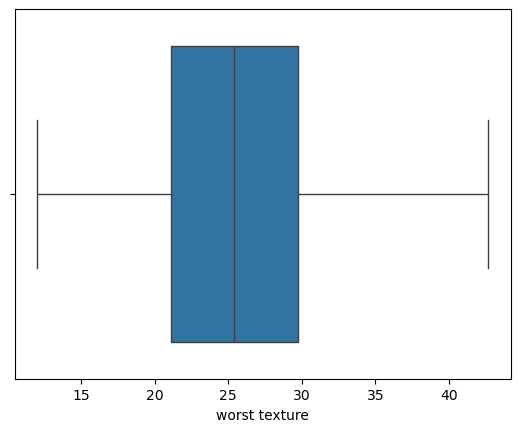

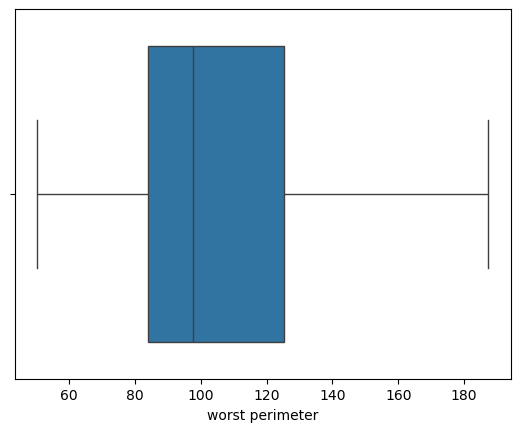

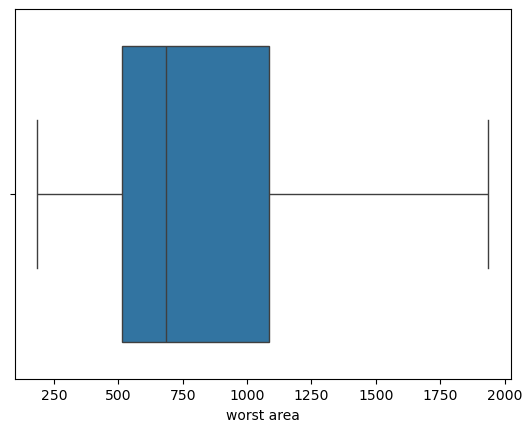

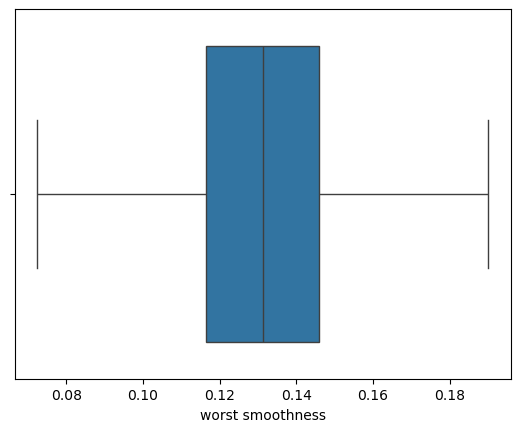

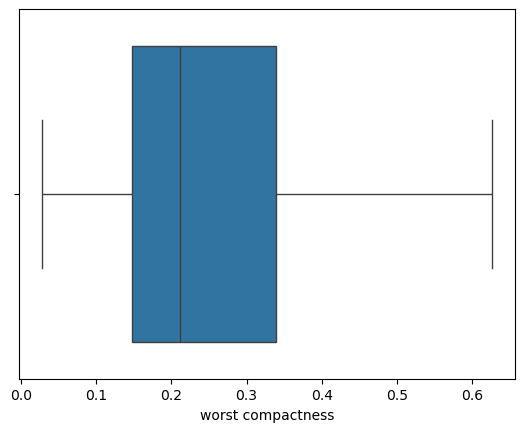

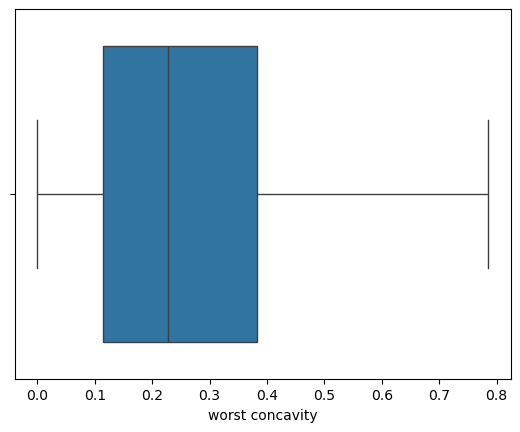

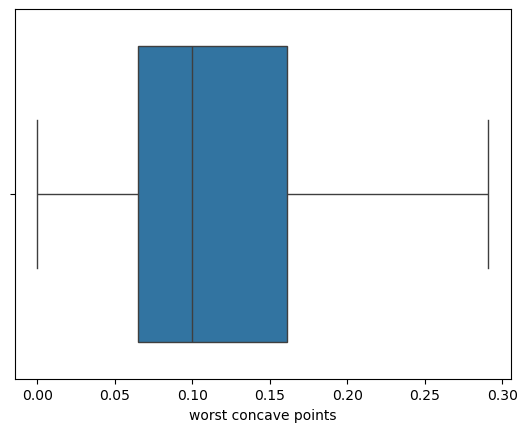

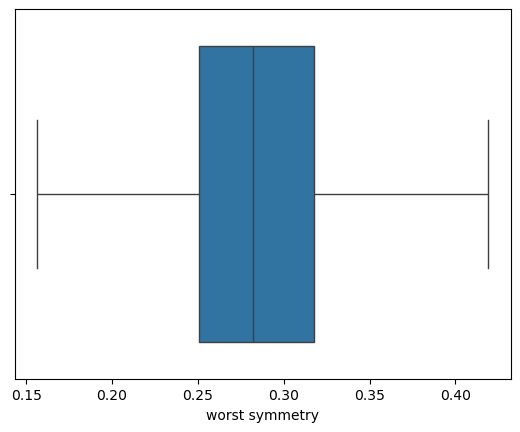

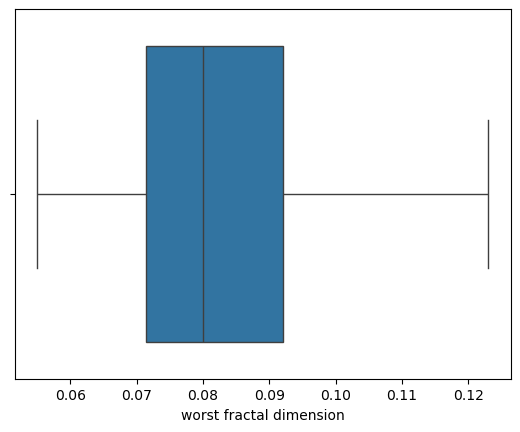

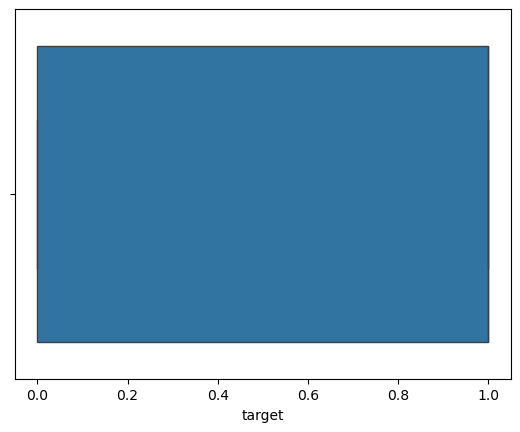

In [219]:
for i in num_columns.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

In [220]:
#skew
df1.skew()

mean radius                0.655953
mean texture               0.449700
mean perimeter             0.701081
mean area                  0.922884
mean smoothness            0.257712
mean compactness           0.826755
mean concavity             1.023859
mean concave points        1.004049
mean symmetry              0.403621
mean fractal dimension     0.682430
radius error               1.025031
texture error              0.740987
perimeter error            1.034389
area error                 1.130940
smoothness error           0.780923
compactness error          0.990285
concavity error            0.916740
concave points error       0.539571
symmetry error             0.869297
fractal dimension error    0.979344
worst radius               0.849779
worst texture              0.386858
worst perimeter            0.874870
worst area                 1.048970
worst smoothness           0.247199
worst compactness          0.915295
worst concavity            0.809174
worst concave points       0

In [221]:
# Apply transformation to remove skewness
pt=PowerTransformer(method='yeo-johnson')
#to get numerical features(columns)
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns
# to save skewness removed features
df1[numerical_features] = pt.fit_transform(df1[numerical_features])
# Check skewness of the transformed features
df1[numerical_features].skew()

mean radius                0.011115
mean texture              -0.002533
mean perimeter             0.010112
mean area                  0.005457
mean smoothness            0.006193
mean compactness           0.102176
mean concavity             0.210993
mean concave points        0.194157
mean symmetry              0.005121
mean fractal dimension     0.049092
radius error               0.157291
texture error              0.021078
perimeter error            0.070418
area error                 0.056353
smoothness error           0.075000
compactness error          0.170630
concavity error            0.102595
concave points error       0.006558
symmetry error             0.109069
fractal dimension error    0.151253
worst radius               0.034750
worst texture             -0.008927
worst perimeter            0.031901
worst area                 0.024929
worst smoothness           0.005460
worst compactness          0.089849
worst concavity            0.083315
worst concave points       0

In [222]:
df2 = df1[numerical_features]

<Axes: title={'center': 'correlation of breast cancer data'}>

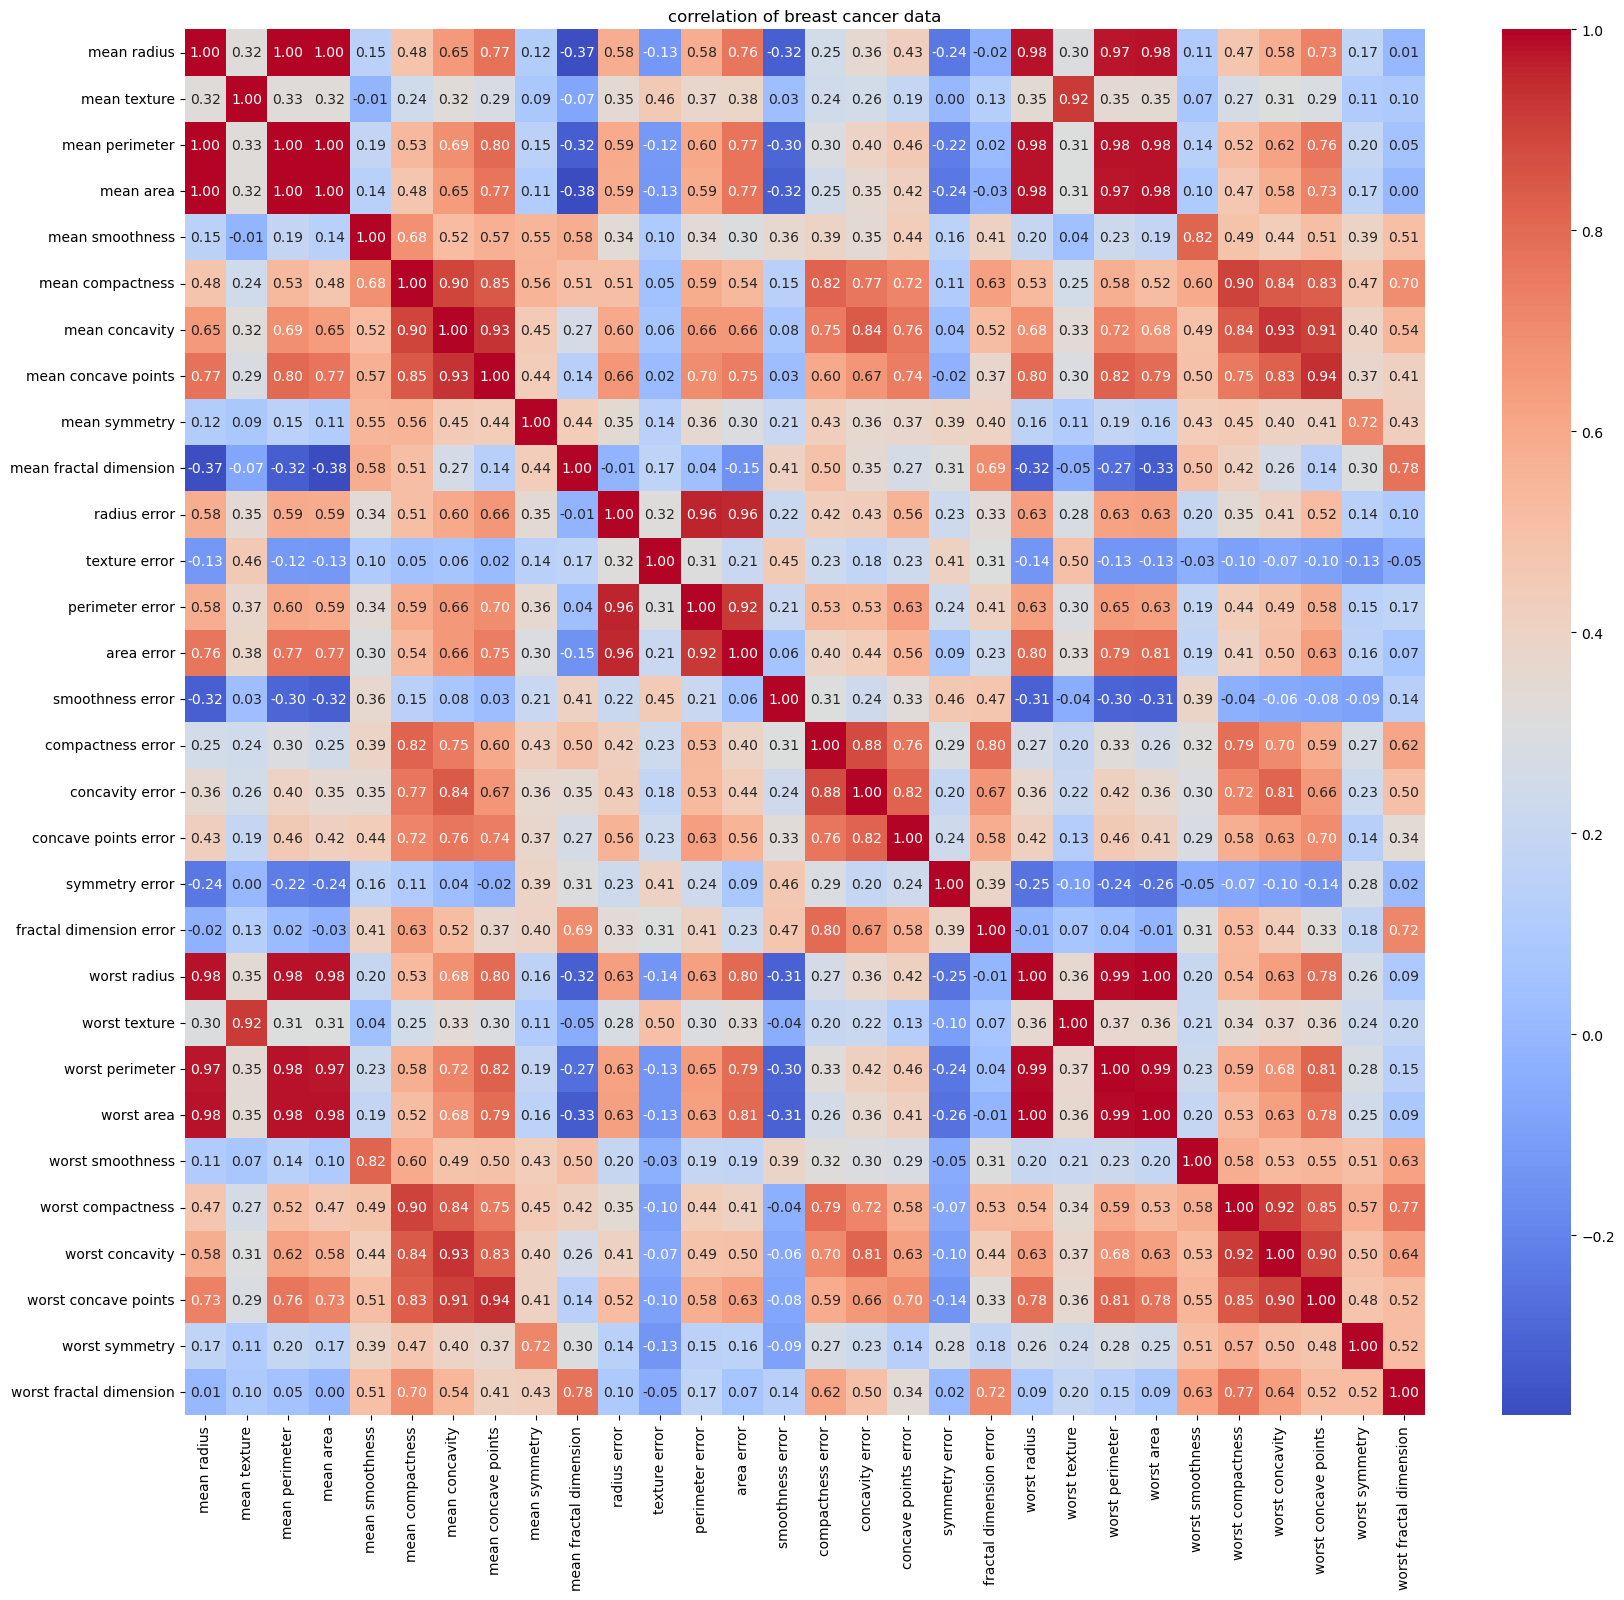

In [223]:
#correlation
correlation = df2.corr()
correlation
plt.figure(figsize=(20,18))
plt.title('correlation of breast cancer data')
sns.heatmap(correlation,annot = True,fmt ='.2f',cmap = 'coolwarm')

In [224]:
# feature selection
# selectkbest
x=df2
y=df['target']
sk=SelectKBest(score_func=f_classif,k=10)
x_new=sk.fit_transform(x,y)

# Get selected feature names and scores
selected_features = x.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')

Feature Scores:
                    Feature       Score
7       mean concave points  979.985907
22          worst perimeter  914.408374
23               worst area  886.559410
27     worst concave points  867.101698
20             worst radius  866.414171
6            mean concavity  717.592998
2            mean perimeter  679.260137
3                 mean area  642.004466
13               area error  624.107657
0               mean radius  623.817127
26          worst concavity  525.741746
12          perimeter error  382.985870
10             radius error  374.097181
5          mean compactness  332.050587
25        worst compactness  328.905902
21            worst texture  153.754387
17     concave points error  153.268894
16          concavity erro

In [225]:
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [226]:
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.172665,-2.612999,1.303242,1.193223,1.557672,1.939324,1.847560,1.868961,2.098277,2.032972,...,1.674752,-1.485029,1.875194,1.722638,1.318152,1.955096,1.788953,1.935654,2.124369,1.825134
1,1.697216,-0.277545,1.592976,1.769690,-0.835257,-0.394789,0.291323,0.823315,0.089075,-0.966260,...,1.630964,-0.297203,1.470361,1.722638,-0.340392,-0.310179,0.061441,1.101594,-0.156175,0.539083
2,1.528511,0.549105,1.512824,1.571529,0.984093,1.190133,1.427109,1.699287,1.019624,-0.312741,...,1.461711,0.064832,1.355625,1.525947,0.580950,1.244939,1.020042,1.722744,1.330307,0.452639
3,-0.772484,0.353712,-0.529022,-0.856072,2.477331,1.939324,1.675749,1.433838,2.223162,2.036229,...,-0.092184,0.223334,-0.047328,-0.456800,2.374851,1.955096,1.729494,1.862378,2.124369,1.944290
4,1.644585,-1.236456,1.652264,1.724810,0.339512,0.769721,1.431056,1.421547,0.077429,-0.530401,...,1.328266,-1.630888,1.349978,1.394803,0.276411,-0.145016,0.824580,0.807077,-0.969692,-0.294213


In [227]:
y.unique()

array([0, 1], dtype=int32)

In [228]:
scaler=StandardScaler()
xscaled=scaler.fit_transform (x)
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.2,random_state=42)

Classification Algorithm Implementation 
1. Logistic Regression:
    * Description: A linear model that predicts probabilities for binary classification problems using the logistic function.
    * Suitability: Simple, interpretable, and effective for linearly separable data.


In [230]:
#classification
# 1.logistic regression
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

Accuracy is : 0.9824561403508771

Classification_report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion matrix : [[42  1]
 [ 1 70]]

Evaluation Matrics

Accuracy: 0.9824561403508771
Precision: 0.9859154929577465
Recall: 0.9859154929577465
F1 Score: 0.9859154929577465


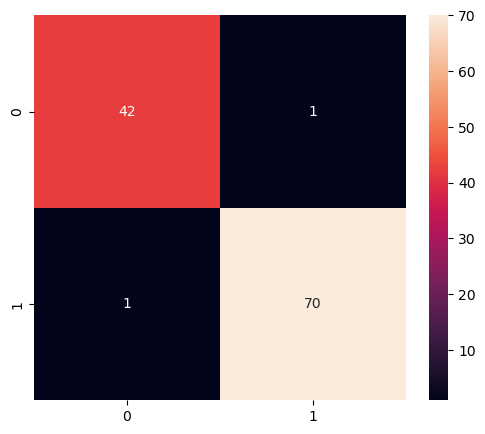

In [231]:
y_pred = model1.predict(x_test)

#Accuracy
accuracy1 = accuracy_score(y_test,y_pred)
print(f"Accuracy is : {accuracy1}")

#classification_report
print("\nClassification_report\n")
print(classification_report(y_test,y_pred))

# Plot heatmap for cofusion matrix
cm1 = confusion_matrix(y_test,y_pred)
print(f"Confusion matrix : {cm1}")
plt.figure(figsize=(6, 5))
sns.heatmap(cm1,annot = True)

#Evaluation matrics
print("\nEvaluation Matrics\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


roc is :0.9813298395021289


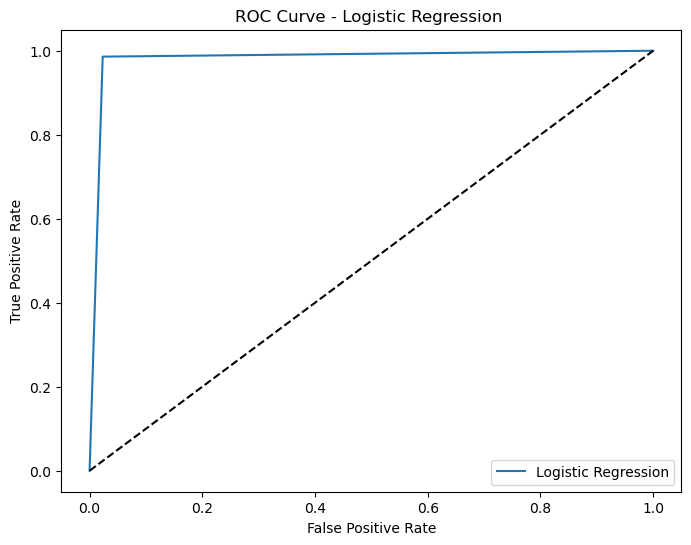

In [232]:
# ROC Curve for Logistic regression
roc = roc_auc_score(y_test,y_pred)
print(f"roc is :{roc}")
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr_lr, tpr_lr, label= 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression ')
plt.legend()
plt.show()

2. Decision Tree Classifier:
    * Description: A non-linear model that splits data into subsets based on feature thresholds to create a tree-like structure.
    * Suitability: Captures non-linear relationships and provides interpretability.

In [234]:
# 2.DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

Accuracy is : 0.9473684210526315

Classification_report

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion matrix : [[40  3]
 [ 3 68]]

Evaluation Matrics

Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394


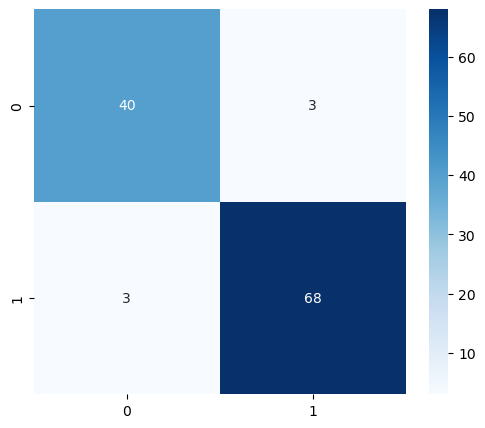

In [235]:
y_dt = model2.predict(x_test)

#Accuracy
accuracy2 = accuracy_score(y_test,y_dt)
print(f"Accuracy is : {accuracy2}")

#classification_report
print("\nClassification_report\n")
print(classification_report(y_test,y_dt))

#Confusion matrix and heatmap
cm2 = confusion_matrix(y_test,y_dt)
print(f"Confusion matrix : {cm2}")
plt.figure(figsize=(6, 5))
sns.heatmap(cm2,annot = True,cmap = "Blues")

#Evaluation matrics
print("\nEvaluation Matrics\n")
print("Accuracy:", accuracy_score(y_test, y_dt))
print("Precision:", precision_score(y_test, y_dt))
print("Recall:", recall_score(y_test, y_dt))
print("F1 Score:", f1_score(y_test, y_dt))



roc is :0.9439895185063871


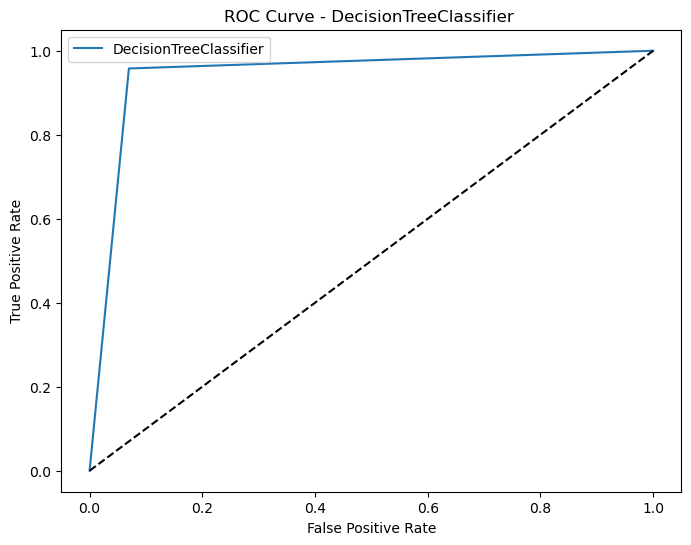

In [236]:
# ROC Curve for DecisionTreeClassifier
roc = roc_auc_score(y_test,y_dt)
print(f"roc is :{roc}")
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_dt)
plt.plot(fpr_lr, tpr_lr, label= 'DecisionTreeClassifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DecisionTreeClassifier ')
plt.legend()
plt.show()

3. Random Forest Classifier:
    * Description: An ensemble method that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting.
    * Suitability: Robust to overfitting and handles high-dimensional data well.

Accuracy is : 0.9649122807017544

Classification_report

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix : [[40  3]
 [ 1 70]]

Evaluation Matrics

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


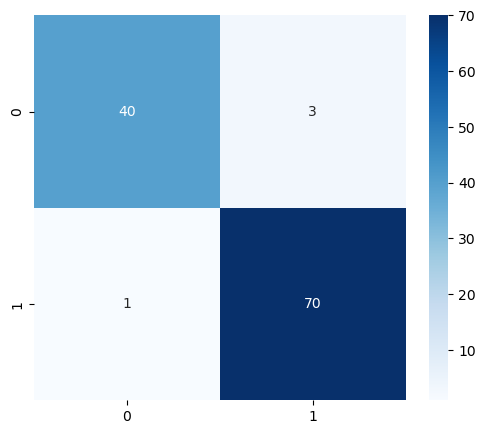

In [238]:
# 3.RandomForestClassifier (ensemble Learning)
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
model3  = RandomForestClassifier()
model3.fit(x_train,y_train)
rf_pred = model3.predict(x_test)
accuracy3 = accuracy_score(y_test,rf_pred)

#Accuracy
accuracy3 = accuracy_score(y_test,rf_pred)
print(f"Accuracy is : {accuracy3}")

#classification_report
print("\nClassification_report\n")
print(classification_report(y_test,rf_pred))

#Confusion matrix and heatmap
cm3 = confusion_matrix(y_test,rf_pred)
print(f"Confusion matrix : {cm3}")
plt.figure(figsize=(6, 5))
sns.heatmap(cm3,annot = True,cmap = "Blues")

#Evaluation matrics
print("\nEvaluation Matrics\n")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))

roc is :0.9580740255486406


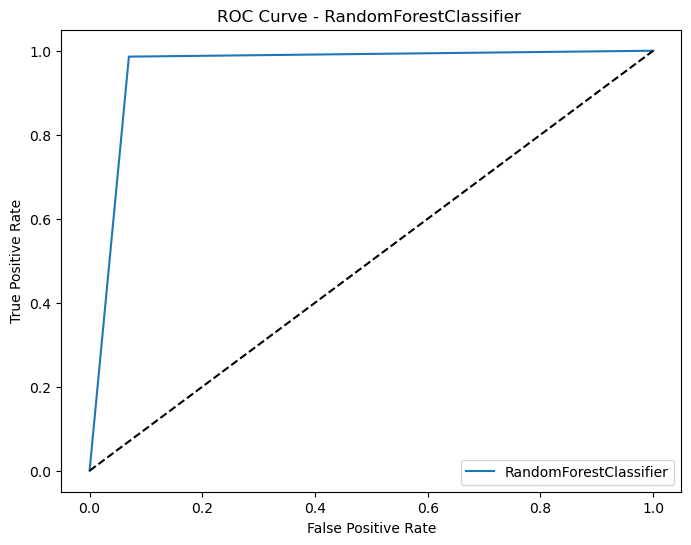

In [239]:
# ROC Curve for RandomForestClassifier
roc = roc_auc_score(y_test,rf_pred)
print(f"roc is :{roc}")
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, rf_pred)
plt.plot(fpr_lr, tpr_lr, label= 'RandomForestClassifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForestClassifier ')
plt.legend()
plt.show()

Accuracy is : 0.9649122807017544

Classification_report

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix : [[40  3]
 [ 1 70]]

Evaluation Matrics

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


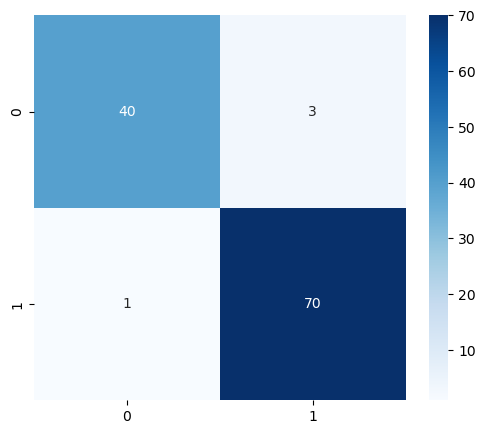

In [240]:
#ensemble Learning : RandomForestClassifier using hyper parameter
model3_1 = RandomForestClassifier(max_depth = 5, n_estimators = 200)
model3_1.fit(x_train,y_train)
rf1_pred = model3_1.predict(x_test)

#Accuracy
accuracy3_1 = accuracy_score(y_test,rf1_pred)
print(f"Accuracy is : {accuracy3_1}")

#classification_report
print("\nClassification_report\n")
print(classification_report(y_test,rf1_pred))

#Confusion matrix and heatmap
cm3_1 = confusion_matrix(y_test,rf1_pred)
print(f"Confusion matrix : {cm3_1}")
plt.figure(figsize=(6, 5))
sns.heatmap(cm3_1,annot = True,cmap = "Blues")

#Evaluation matrics
print("\nEvaluation Matrics\n")
print("Accuracy:", accuracy_score(y_test, rf1_pred))
print("Precision:", precision_score(y_test, rf1_pred))
print("Recall:", recall_score(y_test, rf1_pred))
print("F1 Score:", f1_score(y_test, rf1_pred))

4. Support Vector Machine (SVM):
    * Description: A model that finds the hyperplane maximizing the margin between classes.
    * Suitability: Effective for datasets with clear class boundaries.

Accuracy is : 0.9736842105263158

Classification_report

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix : [[41  2]
 [ 1 70]]

Evaluation Matrics

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


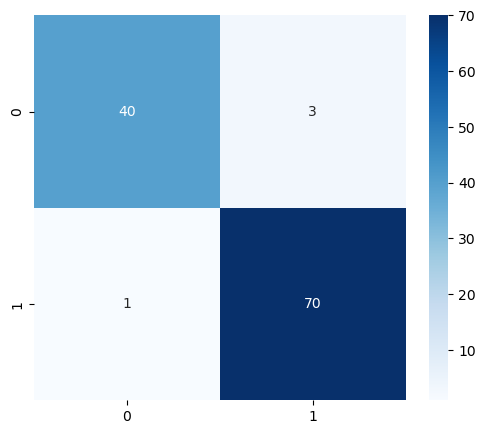

In [242]:
# 4. support vector machine(SVM) : This is used for both classification(SVC:Support Vector classifier) and regression(SVR) problems
model4 = SVC()
model4.fit(x_train,y_train)
y_svc = model4.predict(x_test)

#Accuracy
accuracy4 = accuracy_score(y_test,y_svc)
print(f"Accuracy is : {accuracy4}")

#classification_report
print("\nClassification_report\n")
print(classification_report(y_test,y_svc))

#Confusion matrix and heatmap
cm4 = confusion_matrix(y_test,y_svc)
print(f"Confusion matrix : {cm4}")
plt.figure(figsize=(6, 5))
sns.heatmap(cm3_1,annot = True,cmap = "Blues")

#Evaluation matrics
print("\nEvaluation Matrics\n")
print("Accuracy:", accuracy_score(y_test, y_svc))
print("Precision:", precision_score(y_test, y_svc))
print("Recall:", recall_score(y_test, y_svc))
print("F1 Score:", f1_score(y_test, y_svc))


roc is :0.969701932525385


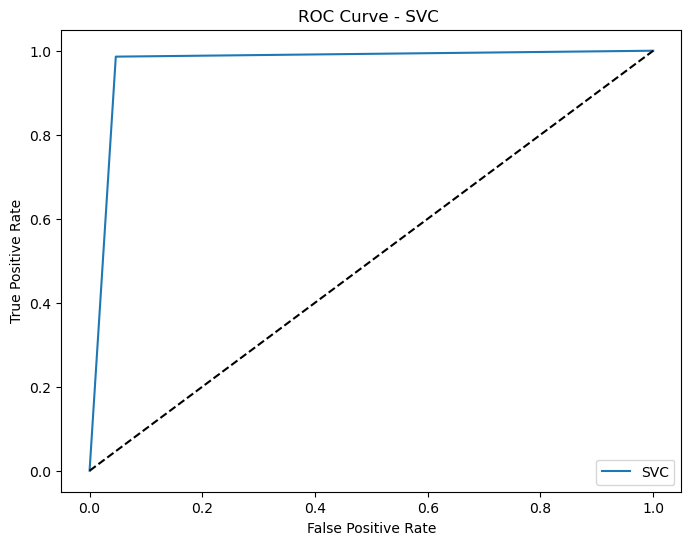

In [243]:
# ROC Curve for SVC
roc = roc_auc_score(y_test,y_svc)
print(f"roc is :{roc}")
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_svc)
plt.plot(fpr_lr, tpr_lr, label= 'SVC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC ')
plt.legend()
plt.show()

5. k-Nearest Neighbors (k-NN):
    * Description: A non-parametric algorithm that predicts a class based on the majority vote of its neighbors.
    * Suitability: Simple and effective for small datasets.

Accuracy is : 0.956140350877193

Classification_report

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix : [[41  2]
 [ 3 68]]

Evaluation Matrics

Accuracy: 0.956140350877193
Precision: 0.9714285714285714
Recall: 0.9577464788732394
F1 Score: 0.9645390070921985


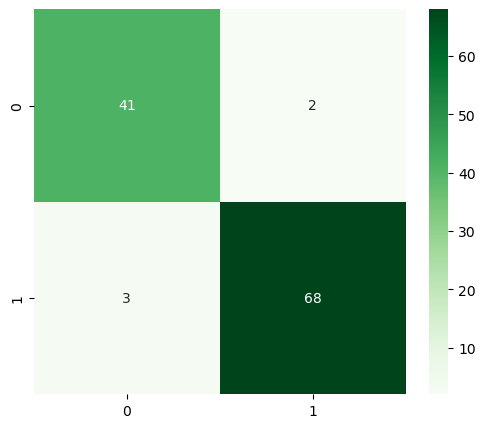

In [245]:
# 5. k-Nearest Neighbors (k-NN)
model5 = KNeighborsClassifier()
model5.fit(x_train,y_train)
y_predknn = model5.predict(x_test)

# evaluation
accuracy5 = accuracy_score(y_test,y_predknn)
print(f"Accuracy is : {accuracy5}")


#classification_report
print("\nClassification_report\n")
print(classification_report(y_test,y_predknn))

#Confusion matrix and heatmap
cm5 = confusion_matrix(y_test,y_predknn)
print(f"Confusion matrix : {cm5}")
plt.figure(figsize=(6, 5))
sns.heatmap(cm5,annot=True,cmap = "Greens")

#Evaluation matrics
print("\nEvaluation Matrics\n")
print("Accuracy:", accuracy_score(y_test, y_predknn))
print("Precision:", precision_score(y_test, y_predknn))
print("Recall:", recall_score(y_test, y_predknn))
print("F1 Score:", f1_score(y_test, y_predknn))


roc is :0.9556174254831314


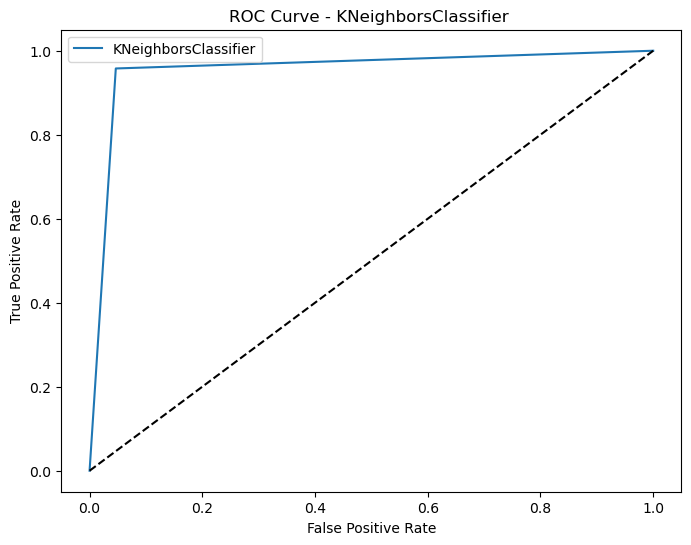

In [246]:
# ROC Curve for KNeighborsClassifier
roc = roc_auc_score(y_test,y_predknn)
print(f"roc is :{roc}")
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predknn)
plt.plot(fpr_lr, tpr_lr, label= 'KNeighborsClassifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNeighborsClassifier ')
plt.legend()
plt.show()

6. Naive Bayes:
    * Description: Probabilistic classifier based on Bayes' Theorem with the assumption of independence between features.
        Common variants include Gaussian, Multinomial, and Bernoulli Naive Bayes.
    * Suitability: Fast and effective for text classification and problems with categorical data.
        Works well even with small datasets.


In [248]:
# 6.Naive Bayes
model6 = GaussianNB()
model6.fit(x_train,y_train)

GaussianNB()

Accuracy is : 0.9736842105263158

Classification_report

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix : [[41  2]
 [ 1 70]]

Evaluation Matrics

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


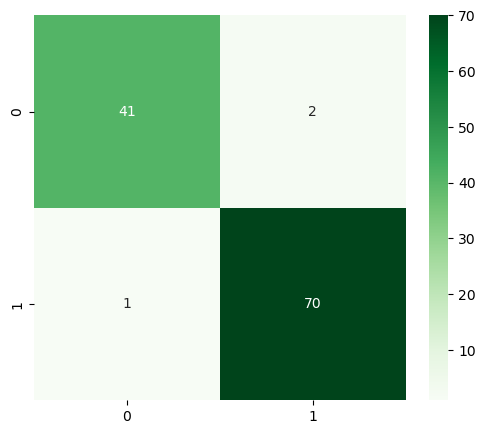

In [249]:
y_nb = model6.predict(x_test)

# evaluation
accuracy6 = accuracy_score(y_test,y_nb)
print(f"Accuracy is : {accuracy6}")

#classification_report
print("\nClassification_report\n")
print(classification_report(y_test,y_nb))

#Confusion matrix and heatmap
cm6 = confusion_matrix(y_test,y_nb)
print(f"Confusion matrix : {cm6}")
plt.figure(figsize=(6, 5))
sns.heatmap(cm6,annot=True,cmap = "Greens")

#Evaluation matrics
print("\nEvaluation Matrics\n")
print("Accuracy:", accuracy_score(y_test, y_nb))
print("Precision:", precision_score(y_test, y_nb))
print("Recall:", recall_score(y_test, y_nb))
print("F1 Score:", f1_score(y_test, y_nb))


Accuracy is : 0.956140350877193

Classification_report

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix : [[40  3]
 [ 2 69]]

Evaluation Matrics

Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965


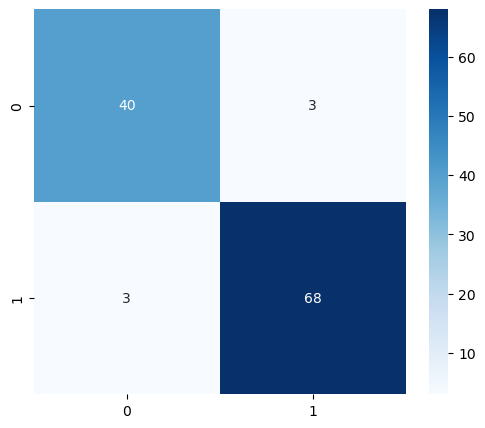

In [250]:
# 7.Gradient boosting
model7 = GradientBoostingClassifier()
model7.fit(x_train,y_train)
gr_pred = model7.predict(x_test)

#Accuracy
accuracy7 = accuracy_score(y_test,gr_pred)
print(f"Accuracy is : {accuracy7}")

#classification_report
print("\nClassification_report\n")
print(classification_report(y_test,gr_pred))

#Confusion matrix and heatmap
cm7 = confusion_matrix(y_test,gr_pred)
print(f"Confusion matrix : {cm7}")
plt.figure(figsize=(6, 5))
sns.heatmap(cm2,annot = True,cmap = "Blues")

#Evaluation matrics
print("\nEvaluation Matrics\n")
print("Accuracy:", accuracy_score(y_test, gr_pred))
print("Precision:", precision_score(y_test, gr_pred))
print("Recall:", recall_score(y_test, gr_pred))
print("F1 Score:", f1_score(y_test, gr_pred))


Accuracy is : 0.9649122807017544

Classification_report

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix : [[40  3]
 [ 1 70]]

Evaluation Matrics

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


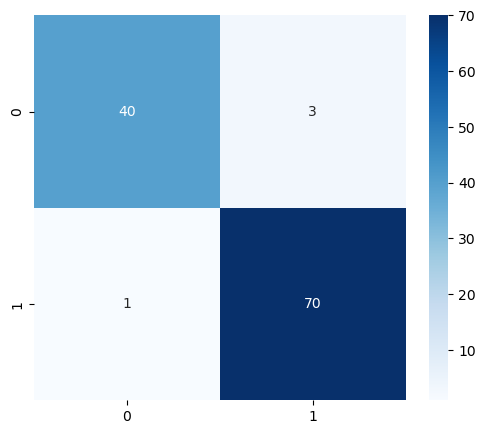

In [251]:
# 7.1.Gradient boosting using hyper parameter
model7_1 = GradientBoostingClassifier(max_depth = 5, n_estimators = 200)
model7_1.fit(x_train,y_train)
gr1_pred = model8.predict(x_test)

#Accuracy
accuracy7_1 = accuracy_score(y_test,gr1_pred)
print(f"Accuracy is : {accuracy7_1}")

#classification_report
print("\nClassification_report\n")
print(classification_report(y_test,gr1_pred))

#Confusion matrix and heatmap
cm7_1 = confusion_matrix(y_test,gr1_pred)
print(f"Confusion matrix : {cm7_1}")
plt.figure(figsize=(6, 5))
sns.heatmap(cm7_1,annot = True,cmap = "Blues")

#Evaluation matrics
print("\nEvaluation Matrics\n")
print("Accuracy:", accuracy_score(y_test, gr1_pred))
print("Precision:", precision_score(y_test, gr1_pred))
print("Recall:", recall_score(y_test, gr1_pred))
print("F1 Score:", f1_score(y_test, gr1_pred))


roc is :0.969701932525385


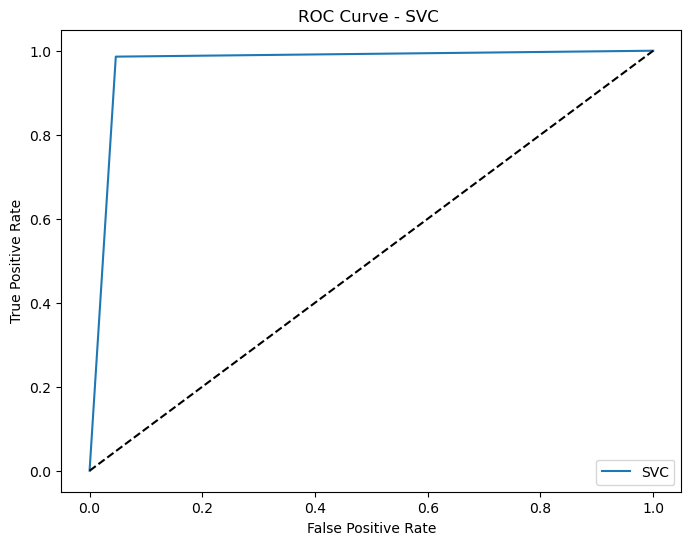

In [252]:
# ROC Curve for SVC
roc = roc_auc_score(y_test,y_svc)
print(f"roc is :{roc}")
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_svc)
plt.plot(fpr_lr, tpr_lr, label= 'SVC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC ')
plt.legend()
plt.show()

In [253]:
# Define models 
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier()
}

In [254]:
# Initialize the results dictionary
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(results[name]['report'])


Training Logistic Regression...
Logistic Regression Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Training SVM...
SVM Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Training Decision Tree...
Decision Tree Accuracy: 0.9386

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


MLP Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


3. Model Comparison 
Compare the performance of the five classification algorithms.
Which algorithm performed the best and which one performed the worst?


In [255]:
# Find the best model
best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {results[best_model_name]['accuracy']:.4f}")


Best Model: Logistic Regression
Best Accuracy: 0.9825


In [310]:
# Find the worst model
worst_model_name = min(results.items(), key=lambda x: x[1]['accuracy'])[0]
worst_model = results[worst_model_name]['model']
print(f"\nWorst Model: {worst_model_name}")
print(f"Worst Accuracy: {results[worst_model_name]['accuracy']:.4f}")


Worst Model: Decision Tree
Worst Accuracy: 0.9386
